In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("final.csv")

In [3]:
df

,Unnamed: 0,Year,FlightDate,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginCityName,OriginWac,DestAirportID,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,19038,2024,2024-01-15,20409,N945JT,616,14771,"San Francisco, CA",91,12478,...,10.6,7.2,15.0,0.0,NaN,54.0,9.0,NaN,1020.4,NaN
1,19039,2024,2024-01-28,19805,N990AU,341,11298,"Dallas/Fort Worth, TX",74,14492,...,7.8,1.1,16.7,0.0,0.0,282.0,10.1,NaN,1028.9,NaN
2,19040,2024,2024-01-02,19393,N7884G,3257,10821,"Baltimore, MD",35,14107,...,5.5,2.8,7.8,0.0,0.0,310.0,15.4,NaN,1019.9,NaN
3,19041,2024,2024-01-07,20304,N311SY,3848,13487,"Minneapolis, MN",63,13232,...,-4.3,-5.0,-1.7,0.0,0.0,317.0,10.2,NaN,1015.0,NaN
4,19042,2024,2024-01-31,20452,N642RW,3493,12264,"Washington, DC",38,10785,...,4.9,2.8,6.7,0.0,0.0,33.0,6.8,NaN,1019.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208993,135356,2024,2024-05-15,19790,N367NW,1317,13487,"Minneapolis, MN",63,12266,...,16.8,11.7,21.7,1.0,0.0,267.0,20.5,NaN,1003.5,NaN
208994,135357,2024,2024-05-29,19790,N587NW,990,14679,"San Diego, CA",91,10397,...,27.4,25.0,30.6,0.0,0.0,139.0,14.0,NaN,1013.7,NaN
208995,135358,2024,2024-05-06,20452,N764YX,3619,14321,"Portland, ME",12,12264,...,23.2,18.9,30.6,0.0,0.0,259.0,6.1,NaN,1017.3,NaN
208996,135359,2024,2024-05-09,19790,N6708D,1353,12451,"Jacksonville, FL",33,10397,...,13.6,8.3,18.3,0.0,0.0,260.0,6.0,NaN,1024.2,NaN


In [4]:
# df.columns

In [5]:
df = df.drop(['Unnamed: 0', 'Year', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'DivAirportLandings', 'wpgt', 'tsun'], axis = 1)

In [6]:
df = df.drop(['Tail_Number'], axis = 1)

In [7]:
# df

In [8]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()

# Combine both columns to ensure consistent encoding
combined_data = pd.concat([df['OriginCityName'], df['DestCityName']], axis=0)

# Fit the encoder on the combined data
le.fit(combined_data)

# Transform both columns with the same encoder
df['OriginCityEncoded'] = le.transform(df['OriginCityName'])
df['DestCityEncoded'] = le.transform(df['DestCityName'])

df.head()

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginCityName,OriginWac,DestAirportID,DestCityName,DestWac,CRSDepTime,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,OriginCityEncoded,DestCityEncoded
0,2024-01-15,20409,616,14771,"San Francisco, CA",91,12478,"New York, NY",22,1556,...,10.6,7.2,15.0,0.0,NaN,54.0,9.0,1020.4,292,231
1,2024-01-28,19805,341,11298,"Dallas/Fort Worth, TX",74,14492,"Raleigh/Durham, NC",36,2059,...,7.8,1.1,16.7,0.0,0.0,282.0,10.1,1028.9,80,271
2,2024-01-02,19393,3257,10821,"Baltimore, MD",35,14107,"Phoenix, AZ",81,605,...,5.5,2.8,7.8,0.0,0.0,310.0,15.4,1019.9,24,257
3,2024-01-07,20304,3848,13487,"Minneapolis, MN",63,13232,"Chicago, IL",41,910,...,-4.3,-5.0,-1.7,0.0,0.0,317.0,10.2,1015.0,213,63
4,2024-01-31,20452,3493,12264,"Washington, DC",38,10785,"Burlington, VT",16,1235,...,4.9,2.8,6.7,0.0,0.0,33.0,6.8,1019.2,343,49


In [12]:
df = df.drop(['OriginCityName', 'DestCityName'], axis = 1)

In [13]:
df = df.drop(['index'], axis = 1)
df.columns

Index(['FlightDate', 'DOT_ID_Reporting_Airline',
       'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginWac',
       'DestAirportID', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelayMinutes',
       'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'Diverted',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax',
       'prcp', 'snow', 'wdir', 'wspd', 'pres', 'OriginCityEncoded',
       'DestCityEncoded'],
      dtype='object')

In [14]:
df['CancellationCode_encoded'].value_counts()

,count
CancellationCode_encoded,
0,204492
2,2678
1,1448
3,345
4,35


In [15]:
grouped = df.groupby(['FlightDate', 'OriginCityEncoded'])

# Fill NaN in Col1 with the mean of matching groups
for col in ['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']:
    df[col] = grouped[col].transform(lambda x: x.fillna(x.mean()))

In [16]:
df.head()

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,DepTime,DepDelayMinutes,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres,OriginCityEncoded,DestCityEncoded
0,2024-01-15,20409,616,14771,91,12478,22,1556,1610.0,14.0,...,10.6,7.2,15.0,0.0,4.285714,54.0,9.0,1020.4,292,231
1,2024-01-28,19805,341,11298,74,14492,36,2059,2106.0,7.0,...,7.8,1.1,16.7,0.0,0.000000,282.0,10.1,1028.9,80,271
2,2024-01-02,19393,3257,10821,35,14107,81,605,604.0,0.0,...,5.5,2.8,7.8,0.0,0.000000,310.0,15.4,1019.9,24,257
3,2024-01-07,20304,3848,13487,63,13232,41,910,904.0,0.0,...,-4.3,-5.0,-1.7,0.0,0.000000,317.0,10.2,1015.0,213,63
4,2024-01-31,20452,3493,12264,38,10785,16,1235,1422.0,107.0,...,4.9,2.8,6.7,0.0,0.000000,33.0,6.8,1019.2,343,49


In [17]:
df.isna().sum()

,0
FlightDate,0
DOT_ID_Reporting_Airline,0
Flight_Number_Reporting_Airline,0
OriginAirportID,0
OriginWac,0
DestAirportID,0
DestWac,0
CRSDepTime,0
DepTime,4376
DepDelayMinutes,4381


In [18]:
df = df.drop(['snow'], axis=1)
df = df.dropna()
df

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,DepTime,DepDelayMinutes,...,CancellationCode_encoded,tavg,tmin,tmax,prcp,wdir,wspd,pres,OriginCityEncoded,DestCityEncoded
4,2024-01-31,20452,3493,12264,38,10785,16,1235,1422.0,107.0,...,0,4.9,2.8,6.7,0.0,33.0,6.8,1019.2,343,49
5,2024-01-15,19790,1204,11433,43,14635,33,1250,1355.0,65.0,...,0,-15.3,-18.5,-11.9,0.0,234.0,21.8,1023.6,88,116
7,2024-01-05,20368,292,14262,91,10666,93,1825,1831.0,6.0,...,0,13.8,5.6,21.7,0.0,326.0,8.5,1020.4,249,30
10,2024-01-13,19790,2459,12197,22,14027,33,1505,1712.0,127.0,...,0,7.9,0.6,13.9,35.3,226.0,21.8,995.3,348,346
17,2024-01-09,19393,1670,14986,33,11259,74,1255,1901.0,366.0,...,0,21.2,17.2,25.0,7.2,178.0,30.8,1010.2,302,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208986,2024-05-22,19393,4081,11259,74,14679,91,2045,2124.0,39.0,...,0,29.6,25.6,33.3,10.4,179.0,10.8,1016.5,79,291
208988,2024-05-16,20397,5574,11057,36,12945,52,1615,1645.0,30.0,...,0,12.6,8.9,16.7,0.9,178.0,13.4,1019.2,59,189
208989,2024-05-02,19790,1314,13487,63,15016,64,1520,1529.0,9.0,...,0,14.9,8.9,20.6,0.5,280.0,13.6,1011.7,213,319
208991,2024-05-03,19805,843,11298,74,10423,74,1635,1742.0,67.0,...,0,23.9,17.8,28.3,0.0,191.0,12.9,1015.9,80,22


In [19]:
df.isna().sum()

,0
FlightDate,0
DOT_ID_Reporting_Airline,0
Flight_Number_Reporting_Airline,0
OriginAirportID,0
OriginWac,0
DestAirportID,0
DestWac,0
CRSDepTime,0
DepTime,0
DepDelayMinutes,0


In [20]:
df[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']] = df[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']].fillna(0)

In [21]:
y = df[['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]

In [22]:
x = df.drop(['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

In [23]:
x.head()

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,CRSArrTime,CRSElapsedTime,Flights,Distance,OriginCityEncoded,DestCityEncoded
4,2024-01-31,20452,3493,12264,38,10785,16,1235,1413,98,1,441,343,49
5,2024-01-15,19790,1204,11433,43,14635,33,1250,1540,170,1,1084,88,116
7,2024-01-05,20368,292,14262,91,10666,93,1825,2123,178,1,1078,249,30
10,2024-01-13,19790,2459,12197,22,14027,33,1505,1808,183,1,1056,348,346
17,2024-01-09,19393,1670,14986,33,11259,74,1255,1440,165,1,934,302,79


In [24]:
y.head()

,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode_encoded,tavg,tmin,tmax,prcp,wdir,wspd,pres
4,1422.0,107.0,1550.0,97.0,0,88.0,69.0,97.0,0.0,0.0,0.0,0.0,0,4.9,2.8,6.7,0.0,33.0,6.8,1019.2
5,1355.0,65.0,1654.0,74.0,0,179.0,158.0,0.0,7.0,9.0,0.0,58.0,0,-15.3,-18.5,-11.9,0.0,234.0,21.8,1023.6
7,1831.0,6.0,2142.0,19.0,0,191.0,163.0,0.0,0.0,18.0,0.0,1.0,0,13.8,5.6,21.7,0.0,326.0,8.5,1020.4
10,1712.0,127.0,2018.0,130.0,0,186.0,165.0,127.0,0.0,3.0,0.0,0.0,0,7.9,0.6,13.9,35.3,226.0,21.8,995.3
17,1901.0,366.0,2101.0,381.0,0,180.0,161.0,0.0,0.0,15.0,0.0,366.0,0,21.2,17.2,25.0,7.2,178.0,30.8,1010.2


In [25]:
y.columns

Index(['DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted',
       'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir',
       'wspd', 'pres'],
      dtype='object')

In [29]:
y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']] = y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']].fillna(0)

<ipython-input-29-66e6cd62c95a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']] = y[['ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']].fillna(0)


In [30]:
y.head()

,DepTime,DepDelayMinutes,ArrTime,ArrDelayMinutes,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode_encoded,tavg,tmin,tmax,prcp,wdir,wspd,pres
4,1422.0,107.0,1550.0,97.0,0,88.0,69.0,97.0,0.0,0.0,0.0,0.0,0,4.9,2.8,6.7,0.0,33.0,6.8,1019.2
5,1355.0,65.0,1654.0,74.0,0,179.0,158.0,0.0,7.0,9.0,0.0,58.0,0,-15.3,-18.5,-11.9,0.0,234.0,21.8,1023.6
7,1831.0,6.0,2142.0,19.0,0,191.0,163.0,0.0,0.0,18.0,0.0,1.0,0,13.8,5.6,21.7,0.0,326.0,8.5,1020.4
10,1712.0,127.0,2018.0,130.0,0,186.0,165.0,127.0,0.0,3.0,0.0,0.0,0,7.9,0.6,13.9,35.3,226.0,21.8,995.3
17,1901.0,366.0,2101.0,381.0,0,180.0,161.0,0.0,0.0,15.0,0.0,366.0,0,21.2,17.2,25.0,7.2,178.0,30.8,1010.2


In [31]:
df['DateObjects'] = pd.to_datetime(df['FlightDate'])

In [32]:
df

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,DepTime,DepDelayMinutes,...,tavg,tmin,tmax,prcp,wdir,wspd,pres,OriginCityEncoded,DestCityEncoded,DateObjects
4,2024-01-31,20452,3493,12264,38,10785,16,1235,1422.0,107.0,...,4.9,2.8,6.7,0.0,33.0,6.8,1019.2,343,49,2024-01-31
5,2024-01-15,19790,1204,11433,43,14635,33,1250,1355.0,65.0,...,-15.3,-18.5,-11.9,0.0,234.0,21.8,1023.6,88,116,2024-01-15
7,2024-01-05,20368,292,14262,91,10666,93,1825,1831.0,6.0,...,13.8,5.6,21.7,0.0,326.0,8.5,1020.4,249,30,2024-01-05
10,2024-01-13,19790,2459,12197,22,14027,33,1505,1712.0,127.0,...,7.9,0.6,13.9,35.3,226.0,21.8,995.3,348,346,2024-01-13
17,2024-01-09,19393,1670,14986,33,11259,74,1255,1901.0,366.0,...,21.2,17.2,25.0,7.2,178.0,30.8,1010.2,302,79,2024-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208986,2024-05-22,19393,4081,11259,74,14679,91,2045,2124.0,39.0,...,29.6,25.6,33.3,10.4,179.0,10.8,1016.5,79,291,2024-05-22
208988,2024-05-16,20397,5574,11057,36,12945,52,1615,1645.0,30.0,...,12.6,8.9,16.7,0.9,178.0,13.4,1019.2,59,189,2024-05-16
208989,2024-05-02,19790,1314,13487,63,15016,64,1520,1529.0,9.0,...,14.9,8.9,20.6,0.5,280.0,13.6,1011.7,213,319,2024-05-02
208991,2024-05-03,19805,843,11298,74,10423,74,1635,1742.0,67.0,...,23.9,17.8,28.3,0.0,191.0,12.9,1015.9,80,22,2024-05-03


In [33]:
df = df.sort_values(by='DateObjects')

In [34]:
df.head()

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,DepTime,DepDelayMinutes,...,tavg,tmin,tmax,prcp,wdir,wspd,pres,OriginCityEncoded,DestCityEncoded,DateObjects
39266,2022-01-01,19805,1921,13303,33,15304,33,2130,2357.0,147.0,...,-8.7,-12.1,-5.2,0.0,2.0,20.2,1033.2,210,328,2022-01-01
39591,2022-01-01,20398,3931,13930,41,11540,74,910,929.0,19.0,...,8.1,1.1,17.2,0.0,170.0,15.8,1017.9,63,99,2022-01-01
46845,2022-01-01,19977,1937,11298,74,13930,41,1438,1643.0,125.0,...,6.7,-2.7,12.8,7.1,343.0,20.2,1023.2,80,63,2022-01-01
46762,2022-01-01,20409,46,12953,22,15304,33,1115,1139.0,24.0,...,1.8,-3.8,7.8,0.0,62.0,6.1,1027.8,231,328,2022-01-01
46748,2022-01-01,20363,4632,10397,34,12197,22,1620,1700.0,40.0,...,2.8,-3.0,7.5,0.3,0.0,17.4,1021.5,19,348,2022-01-01


In [35]:
df = df.drop(['FlightDate'], axis = 1)

In [36]:
df['Year'] = df['DateObjects'].dt.year
df['Month'] = df['DateObjects'].dt.month
df['Day'] = df['DateObjects'].dt.day
df['Quarter'] = df['DateObjects'].dt.quarter
df['Week'] = df['DateObjects'].dt.isocalendar().week

In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [105]:
cut_off_date = pd.to_datetime('2024-01-01')

# Split the DataFrame into training and testing sets
train_df = df[df['DateObjects'] < cut_off_date]  # Training data
test_df = df[df['DateObjects'] >= cut_off_date]

In [106]:
#'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'

In [141]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

In [142]:
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

In [143]:
# y_test.head()

In [144]:
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate R² score for accuracy
r2_scores = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R² Score: {r2_scores}")

MAE: 18.452547525816744
R² Score: 0.0026263534301613285


In [145]:
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
y_pred

,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,7.789529,3.839506,11.947494,3.428429,195.558698,12.139651,1017.060736
1,7.768204,3.816594,11.912467,3.140069,193.582456,12.062064,1017.160722
2,8.036867,4.065681,12.221093,3.472541,191.476641,11.868970,1017.284087
3,7.637286,3.751243,11.735961,3.232775,190.390549,11.915153,1017.268344
4,7.769879,3.794239,11.914703,3.406901,193.996420,12.153128,1017.016689
...,...,...,...,...,...,...,...
16352,19.266003,14.660577,24.072233,3.490050,177.147515,15.056208,1011.888035
16353,19.407669,14.734324,24.160424,3.697494,178.055675,15.276359,1011.586338
16354,19.276147,14.760009,23.905397,3.453073,182.167444,15.168913,1011.773820
16355,19.474386,14.839306,24.291203,3.575441,177.985342,15.011653,1011.639796


In [146]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

In [147]:
x_test.head()

,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginWac,DestAirportID,DestWac,CRSDepTime,CRSArrTime,CRSElapsedTime,Flights,...,Day,Quarter,Week,tavg,tmin,tmax,prcp,wdir,wspd,pres
0,20304,3403,14893,91,14747,93,910,1113,123,1,...,1,1,1,7.789529,3.839506,11.947494,3.428429,195.558698,12.139651,1017.060736
1,20304,3270,10423,74,11503,82,807,1023,196,1,...,1,1,1,7.768204,3.816594,11.912467,3.140069,193.582456,12.062064,1017.160722
2,20409,290,14679,91,12478,22,1245,2108,323,1,...,1,1,1,8.036867,4.065681,12.221093,3.472541,191.476641,11.868970,1017.284087
3,19805,1522,12451,33,11057,36,1838,2002,84,1,...,1,1,1,7.637286,3.751243,11.735961,3.232775,190.390549,11.915153,1017.268344
4,20304,3397,12892,91,15023,91,1040,1229,109,1,...,1,1,1,7.769879,3.794239,11.914703,3.406901,193.996420,12.153128,1017.016689


In [148]:
x_test.columns

Index(['DOT_ID_Reporting_Airline', 'Flight_Number_Reporting_Airline',
       'OriginAirportID', 'OriginWac', 'DestAirportID', 'DestWac',
       'CRSDepTime', 'CRSArrTime', 'CRSElapsedTime', 'Flights', 'Distance',
       'OriginCityEncoded', 'DestCityEncoded', 'Year', 'Month', 'Day',
       'Quarter', 'Week', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd',
       'pres'],
      dtype='object')

In [150]:
model_delay = LinearRegression()
model_delay.fit(x_train, y_train)

# Make predictions
y_pred = model_delay.predict(x_test)

# Calculate R² score for accuracy
r2_scores = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R² Score: {r2_scores}")

MAE: 12.384571385383632
R² Score: 0.45821396999001573


In [151]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
y_pred

,Diverted,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CancellationCode_encoded
0,0.0,131.701490,94.031722,32.651792,7.104441,14.433299,0.153386,21.909897,0.0
1,0.0,203.388319,152.939112,40.109488,9.539152,19.915886,0.130363,15.850781,0.0
2,0.0,331.489122,291.516464,24.767557,2.726878,22.077078,0.241946,27.938684,0.0
3,0.0,86.949392,56.048031,18.571995,3.724182,12.294146,0.128658,33.558921,0.0
4,0.0,116.125450,77.120073,33.642197,8.163350,14.898210,0.144937,21.911242,0.0
...,...,...,...,...,...,...,...,...,...
16352,0.0,137.554280,108.616098,12.057808,1.986048,15.621606,0.072646,31.587103,0.0
16353,0.0,184.899212,149.786552,25.987107,5.587474,22.770220,0.202135,14.368622,0.0
16354,0.0,258.750892,225.714922,22.188990,2.032467,21.455795,0.224082,14.099865,0.0
16355,0.0,195.571169,160.772081,17.389406,4.132039,19.677149,0.076643,24.207835,0.0


In [152]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

In [153]:
# x_train

In [154]:
model_deparrdelay = LinearRegression()
model_deparrdelay.fit(x_train, y_train)

# Make predictions
y_pred = model_deparrdelay.predict(x_test)

# Calculate R² score for accuracy
r2_scores = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R² Score: {r2_scores}")

MAE: 179.49583711688572
R² Score: 0.3802344539044074


In [155]:
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
y_pred

,DepTime,DepDelayMinutes,ArrTime
0,1003.316941,68.462164,1362.238620
1,953.559624,79.036688,1334.734318
2,1319.103359,70.090178,1827.215830
3,1872.518479,65.563024,1749.784741
4,1138.468186,72.434384,1418.592832
...,...,...,...
16352,1682.220987,54.263484,1658.542875
16353,740.780189,57.040887,1266.380554
16354,871.015907,47.220390,1269.966152
16355,1303.927637,57.602125,1585.477220


In [156]:
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

In [157]:
model_arrdelay = LinearRegression()
model_arrdelay.fit(x_train, y_train)

# Make predictions
y_pred = model_arrdelay.predict(x_test)

# Calculate R² score for accuracy
r2_scores = r2_score(y_test, y_pred, multioutput='variance_weighted')
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R² Score: {r2_scores}")

MAE: 51.7051185519874
R² Score: 0.005484155659331802


37
37


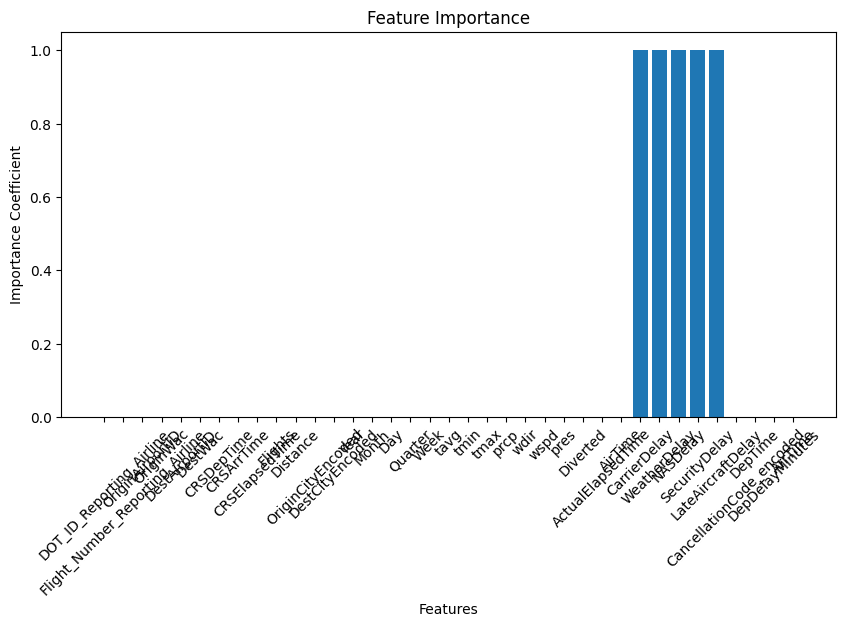

In [158]:
# Plot feature importance
importance = model_arrdelay.coef_[0]
print(len(importance))
features = x_train.columns
print(len(features))

plt.figure(figsize=(10, 5))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Coefficient')
plt.xticks(rotation=45)
plt.show()

MAE (Liner Regression Multi-target): 12.38571721637682
R² Score (Linear Regression Multi-target): 0.4581087069790984
MAPE (Linear Regression Multi-target): 1669303743030813184.00%
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5324
[LightGBM] [Info] Number of data points in the train set: 27000, number of used features: 31
[LightGBM] [Info] Start training from score 63.280333
MAE for Linear Regression (DepDelayMinutes): 53.14652663400443
MAE for LightGBM (DepDelayMinutes): 50.40921593030324
R² Score for Linear Regression (DepDelayMinutes): 0.001781995967854333
R² Score for LightGBM (DepDelayMinutes): -0.020941751855875657


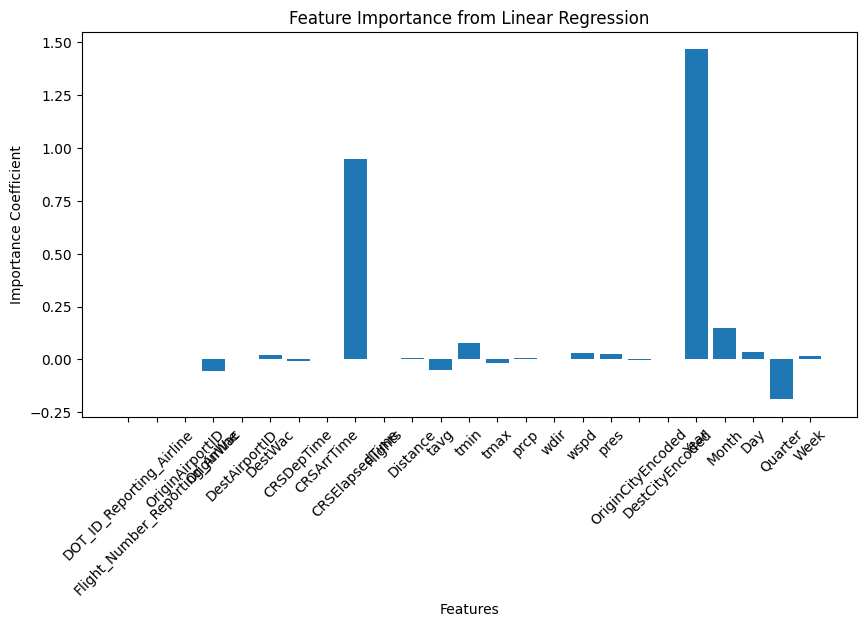

In [66]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the target columns
targets = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']

# Define x_train and y_train for initial Linear Regression
y_train_multi = train_df[targets]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes'] + targets, axis=1)
y_test_multi = test_df[targets]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes'] + targets, axis=1)

# Train the initial Linear Regression model for multi-target prediction
model = LinearRegression()

model.fit(x_train, y_train_multi)

# Make predictions
y_pred = model.predict(x_test)

# Calculate R² and MAPE scores for multi-target predictions
mae = mean_absolute_error(y_test_multi, y_pred)
r2_scores = r2_score(y_test_multi, y_pred, multioutput='variance_weighted')
mape_score = mean_absolute_percentage_error(y_test_multi, y_pred)
print(f"MAE (Liner Regression Multi-target): {mae}")
print(f"R² Score (Linear Regression Multi-target): {r2_scores}")
print(f"MAPE (Linear Regression Multi-target): {mape_score:.2%}")

# Convert y_pred to DataFrame for concatenation
y_pred_df = pd.DataFrame(y_pred, columns=targets)

# Concatenate x_train and y_train for single-target model training (DepDelayMinutes)
x_train_combined = pd.concat([x_train.reset_index(drop=True), y_train_multi.reset_index(drop=True)], axis=1)
y_train_delay = train_df[['DepDelayMinutes']]

x_test_combined = pd.concat([x_test.reset_index(drop=True), y_pred_df.reset_index(drop=True)], axis=1)
y_test_delay = test_df[['DepDelayMinutes']]

# Train a single-target Linear Regression model
model_delay = LinearRegression()
model_delay.fit(x_train_combined, y_train_delay)

# Train LightGBM model on the same data
lgbm_model = lgb.LGBMRegressor()
lgbm_model.fit(x_train_combined, y_train_delay.values.ravel())  # Flatten y_train_delay to 1D

# Make predictions for DepDelayMinutes
y_pred_delay_linear = model_delay.predict(x_test_combined)
y_pred_delay_lgbm = lgbm_model.predict(x_test_combined)

# Calculate R² score for both Linear Regression and LightGBM
mae_delay_linear = mean_absolute_error(y_test_delay, y_pred_delay_linear)
mae_delay_lgbm = mean_absolute_error(y_test_delay, y_pred_delay_lgbm)
r2_score_delay_linear = r2_score(y_test_delay, y_pred_delay_linear)
r2_score_delay_lgbm = r2_score(y_test_delay, y_pred_delay_lgbm)
print(f"MAE for Linear Regression (DepDelayMinutes): {mae_delay_linear}")
print(f"MAE for LightGBM (DepDelayMinutes): {mae_delay_lgbm}")
print(f"R² Score for Linear Regression (DepDelayMinutes): {r2_score_delay_linear}")
print(f"R² Score for LightGBM (DepDelayMinutes): {r2_score_delay_lgbm}")

# Plot feature importance from Linear Regression
importance = model.coef_[1]  # Coefficients from the multi-target Linear Regression
features = x_train.columns

plt.figure(figsize=(10, 5))
plt.bar(features, importance)
plt.title('Feature Importance from Linear Regression')
plt.xlabel('Features')
plt.ylabel('Importance Coefficient')
plt.xticks(rotation=45)
plt.show()


In [217]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

In [218]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Random Forest Regressor): {mae}")
print(f"Mean Squared Error (Random Forest Regressor): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (Random Forest Regressor): 17.013329560609346
Mean Squared Error (Random Forest Regressor): 1630.6823574285088
R^2 Score: 0.19181528461146652


In [168]:
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

In [169]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Random Forest Regressor): {mae}")
print(f"Mean Squared Error (Random Forest Regressor): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (Random Forest Regressor): 12.278459850692531
Mean Squared Error (Random Forest Regressor): 1477.805152337768
R^2 Score: 0.42055331014601804


In [170]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'ArrDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'ArrDelayMinutes', 'ArrTime']]

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Random Forest Regressor): {mae}")
print(f"Mean Squared Error (Random Forest Regressor): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (Random Forest Regressor): 111.39573862362681
Mean Squared Error (Random Forest Regressor): 98907.05711104143
R^2 Score: 0.35234278506695293


In [219]:
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'ArrDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepDelayMinutes']]

ValueError: Shape of passed values is (32224, 7), indices imply (32224, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error (Random Forest Regressor): 49.394755762059056
Mean Squared Error (Random Forest Regressor): 11614.026533912087
R^2 Score: -0.07553956041235765


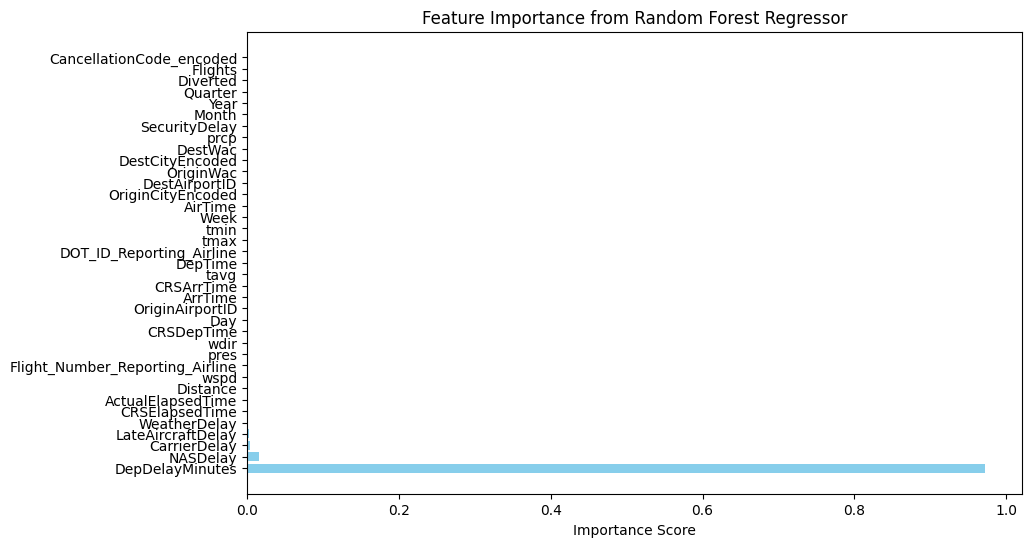

In [173]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Random Forest Regressor): {mae}")
print(f"Mean Squared Error (Random Forest Regressor): {mse}")
print(f"R^2 Score: {r2}")

importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest Regressor')
plt.show()


Mean Squared Error: 1531.419611634842
R^2 Score: 0.4062694731072981
Mean Absolute Error (Random Forest Regressor): 117.31418760571414
Mean Squared Error (Random Forest Regressor): 100558.4724454325
R^2 Score: 0.34541803012304567


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 11799.05862099407
R^2 Score: -0.09267481742432038


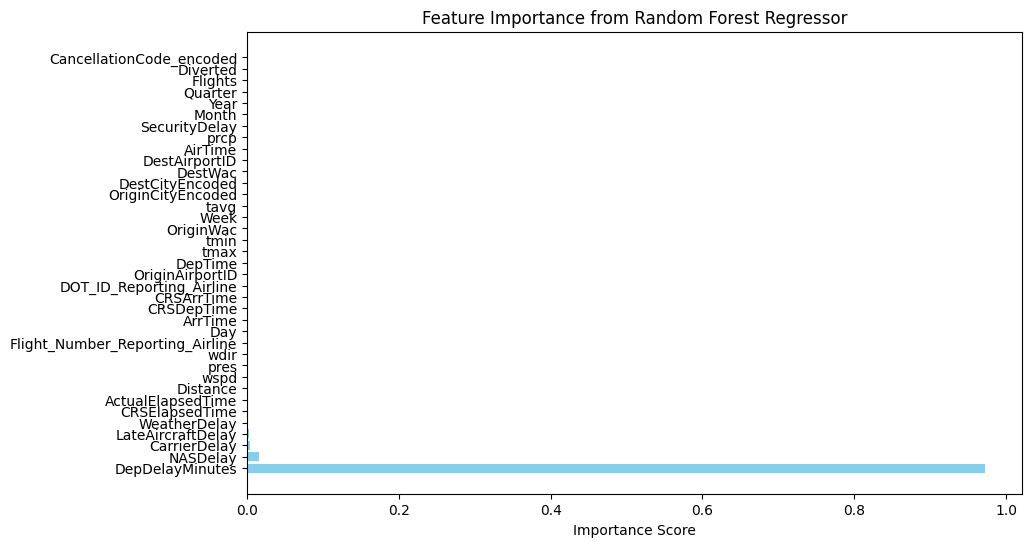

In [174]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Random Forest Regressor): {mae}")
print(f"Mean Squared Error (Random Forest Regressor): {mse}")
print(f"R^2 Score: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest Regressor')
plt.show()

In [175]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Decision Tree Regressor): {mae}")
print(f"Mean Squared Error (Decision Tree Regressor): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (Decision Tree Regressor): 24.88600642800379
Mean Squared Error (Decision Tree Regressor): 3657.3095309347686
R^2 Score: -0.9855485570525925


In [176]:
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Decison Tree Regressor): {mae}")
print(f"Mean Squared Error (Decsion Tree Regressor): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (Decison Tree Regressor): 16.613804487375436
Mean Squared Error (Decsion Tree Regressor): 3097.718408021031
R^2 Score: -0.2081041411410405


In [177]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Decison Tree Regressor): {mae}")
print(f"Mean Squared Error (Decsion Tree Regressor): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (Decison Tree Regressor): 158.83228383362882
Mean Squared Error (Decsion Tree Regressor): 163302.49746285993
R^2 Score: -0.1415738475772009


Mean Absolute Error (Decison Tree Regressor): 73.98006969493183
Mean Squared Error (Decsion Tree Regressor): 21975.312832426484
R^2 Score: -1.0350666700044693


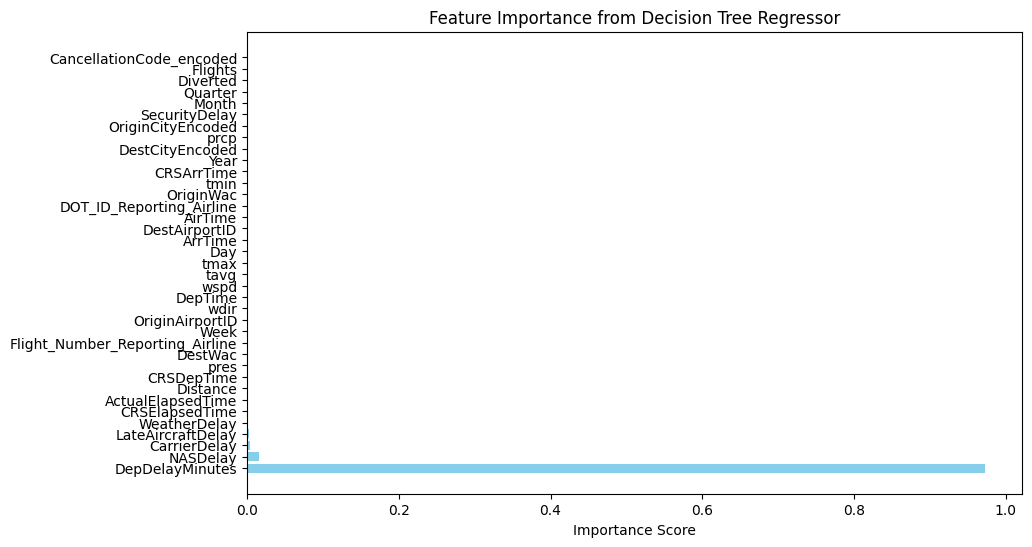

In [178]:
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Decison Tree Regressor): {mae}")
print(f"Mean Squared Error (Decsion Tree Regressor): {mse}")
print(f"R^2 Score: {r2}")

importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Decision Tree Regressor')
plt.show()


Mean Absolute Error (Decison Tree Regressor): 16.945996617146584
Mean Squared Error (Decsion Tree Regressor): 3182.3370150733967
R^2 Score: -0.1768777024455773
Mean Absolute Error (Decison Tree Regressor): 165.95763281775385
Mean Squared Error (Decsion Tree Regressor): 174300.66024739662
R^2 Score: -0.18590573259400886
Mean Absolute Error (Decison Tree Regressor): 75.66711499663752
Mean Squared Error (Decsion Tree Regressor): 22297.692058445926
R^2 Score: -1.0649212264777645


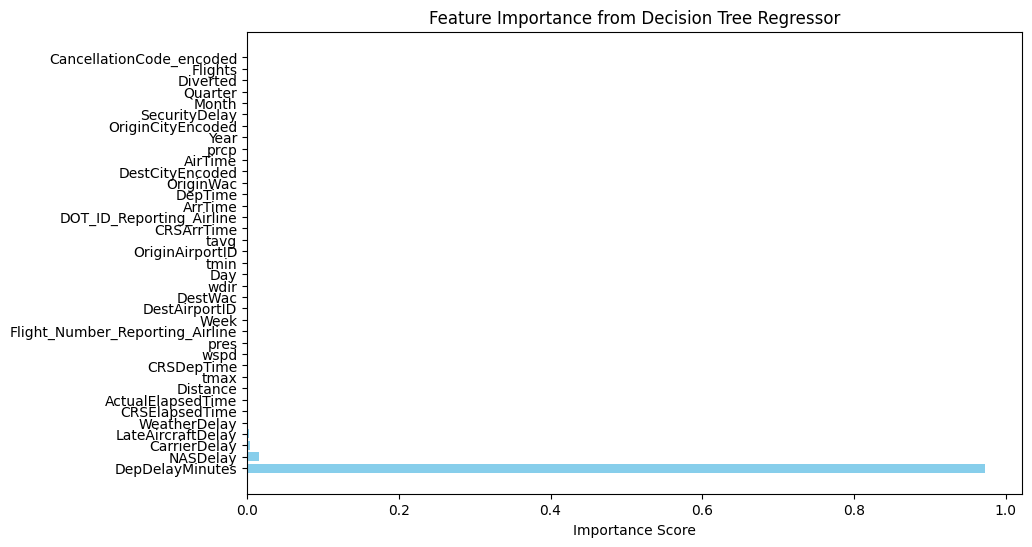

In [179]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Decison Tree Regressor): {mae}")
print(f"Mean Squared Error (Decsion Tree Regressor): {mse}")
print(f"R^2 Score: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Decison Tree Regressor): {mae}")
print(f"Mean Squared Error (Decsion Tree Regressor): {mse}")
print(f"R^2 Score: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Decison Tree Regressor): {mae}")
print(f"Mean Squared Error (Decsion Tree Regressor): {mse}")
print(f"R^2 Score: {r2}")

importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Decision Tree Regressor')
plt.show()



In [180]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Lasso Regressor): {mae}")
print(f"Mean Squared Error (Lasso Regressor): {mse}")
print(f"R^2 Score: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Lasso Regressor): {mae}")
print(f"Mean Squared Error (Lasso Regressor): {mse}")
print(f"R^2 Score: {r2}")


Mean Absolute Error (Lasso Regressor): 18.47074119106909
Mean Squared Error (Lasso Regressor): 1788.1795793724793
R^2 Score: 0.10223202688324695


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Mean Absolute Error (Lasso Regressor): 12.30864265753747
Mean Squared Error (Lasso Regressor): 1420.5072998474889
R^2 Score: 0.43598220457055076
Mean Squared Error: 1420.5072998474889
R^2 Score: 0.43598220457055076


Mean Absolute Error (Lasso Regressor): 180.2938410500001
Mean Squared Error (Lasso Regressor): 135684.4878984318
R^2 Score: 0.2934358940616159


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e+05, tolerance: 2.509e+04
  model = cd_fast.enet_coordinate_descent(


Mean Absolute Error (Lasso Regressor): 51.372703631784084
Mean Squared Error (Lasso Regressor): 10746.44550130642
R^2 Score: 0.004804471840897939


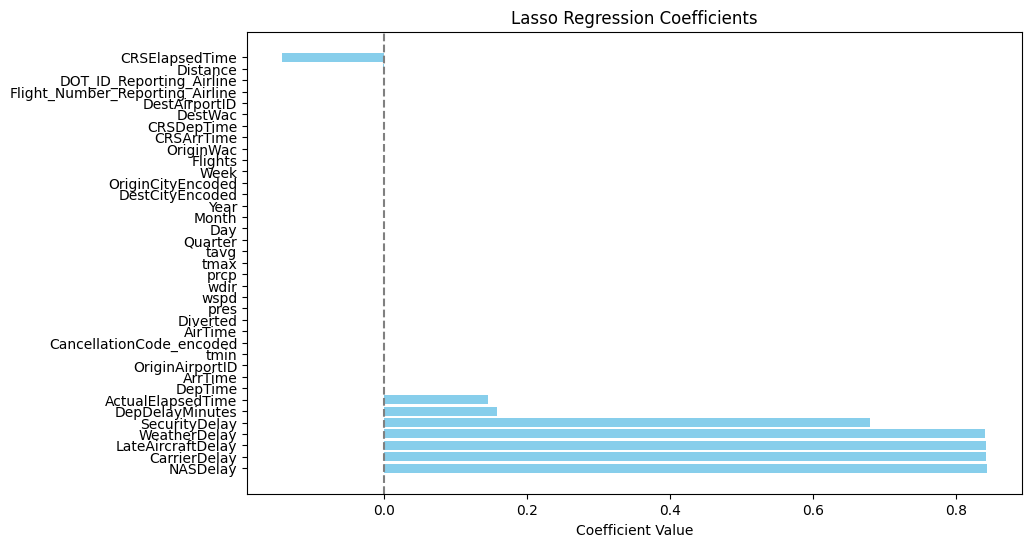

In [181]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Lasso Regressor): {mae}")
print(f"Mean Squared Error (Lasso Regressor): {mse}")
print(f"R^2 Score: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Lasso Regressor): {mae}")
print(f"Mean Squared Error (Lasso Regressor): {mse}")
print(f"R^2 Score: {r2}")

coefficients = lasso.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Mean Absolute Error (Lasso Regressor): 12.302108555885606
Mean Squared Error (Lasso Regressor): 1420.4765016684332
R^2 Score: 0.43600048375414185
Mean Absolute Error (Lasso Regressor): 180.2610123196943
Mean Squared Error (Lasso Regressor): 135695.52756487668
R^2 Score: 0.29320337165904603


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.048e+05, tolerance: 2.509e+04
  model = cd_fast.enet_coordinate_descent(


Mean Absolute Error (Lasso Regressor): 51.338612252178514
Mean Squared Error (Lasso Regressor): 10752.259116321216
R^2 Score: 0.004266090692967572


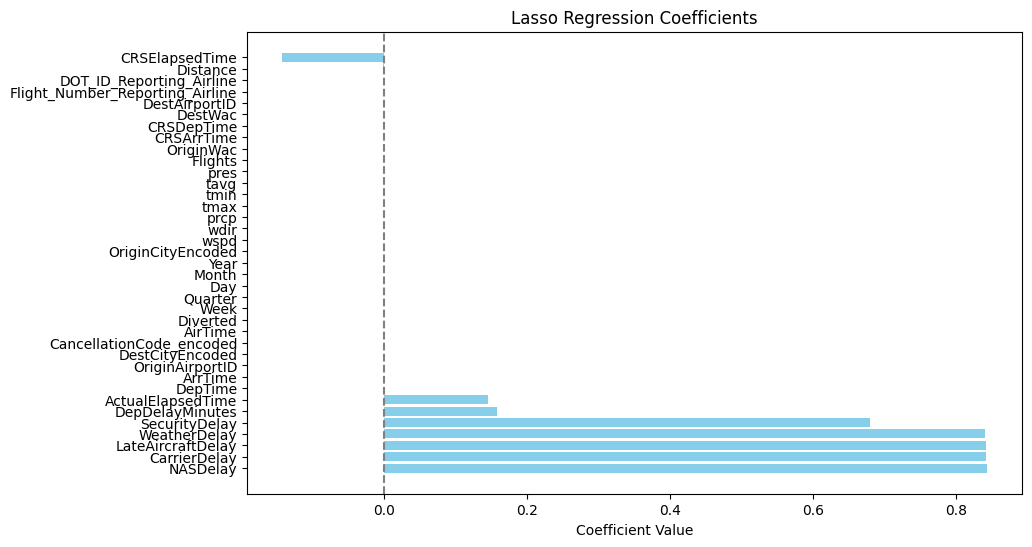

In [182]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Lasso Regressor): {mae}")
print(f"Mean Squared Error (Lasso Regressor): {mse}")
print(f"R^2 Score: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Lasso Regressor): {mae}")
print(f"Mean Squared Error (Lasso Regressor): {mse}")
print(f"R^2 Score: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
lasso = Lasso(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
lasso.fit(x_train, y_train)

# Make predictions
y_pred = lasso.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Lasso Regressor): {mae}")
print(f"Mean Squared Error (Lasso Regressor): {mse}")
print(f"R^2 Score: {r2}")

coefficients = lasso.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
plt.show()

In [183]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Ridge Regressor): {mae}")
print(f"Mean Squared Error (Ridge Regressor): {mse}")
print(f"R^2 Score: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Ridge Regressor): {mae}")
print(f"Mean Squared Error (Ridge Regressor): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (Ridge Regressor): 18.452511914184836
Mean Squared Error (Ridge Regressor): 1790.4621423469669
R^2 Score: 0.13521161184860994
Mean Absolute Error (Ridge Regressor): 12.384552467634569
Mean Squared Error (Ridge Regressor): 1419.5877326532031
R^2 Score: 0.43669190866231045


Mean Absolute Error (Ridge Regressor): 179.49600351358654
Mean Squared Error (Ridge Regressor): 135732.73986462218
R^2 Score: 0.29295372516989204
Mean Absolute Error (Ridge Regressor): 51.70506785899364
Mean Squared Error (Ridge Regressor): 10739.10719880784
R^2 Score: 0.005484049644551958


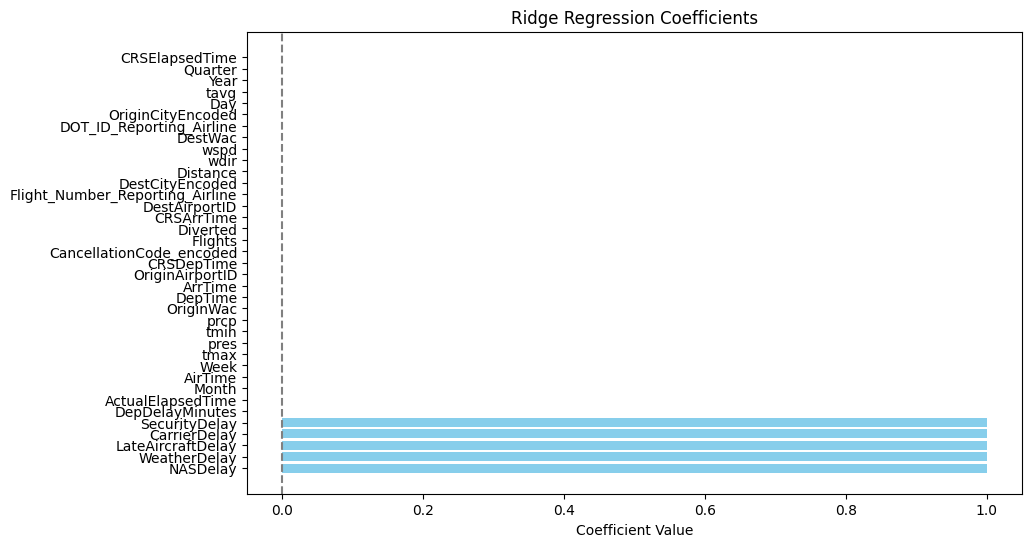

In [184]:
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Ridge Regressor): {mae}")
print(f"Mean Squared Error (Ridge Regressor): {mse}")
print(f"R^2 Score: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Ridge Regressor): {mae}")
print(f"Mean Squared Error (Ridge Regressor): {mse}")
print(f"R^2 Score: {r2}")

coefficients = ridge.coef_.flatten()

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
plt.show()

Mean Absolute Error (Ridge Regressor): 12.385696975526717
Mean Squared Error (Ridge Regressor): 1419.8635672992432
R^2 Score: 0.43659717468390874
Mean Absolute Error (Ridge Regressor): 179.5046851648918
Mean Squared Error (Ridge Regressor): 135749.23196191384
R^2 Score: 0.292691677144509
Mean Absolute Error (Ridge Regressor): 51.70490386176735
Mean Squared Error (Ridge Regressor): 10746.378203740254
R^2 Score: 0.0048107040631610865


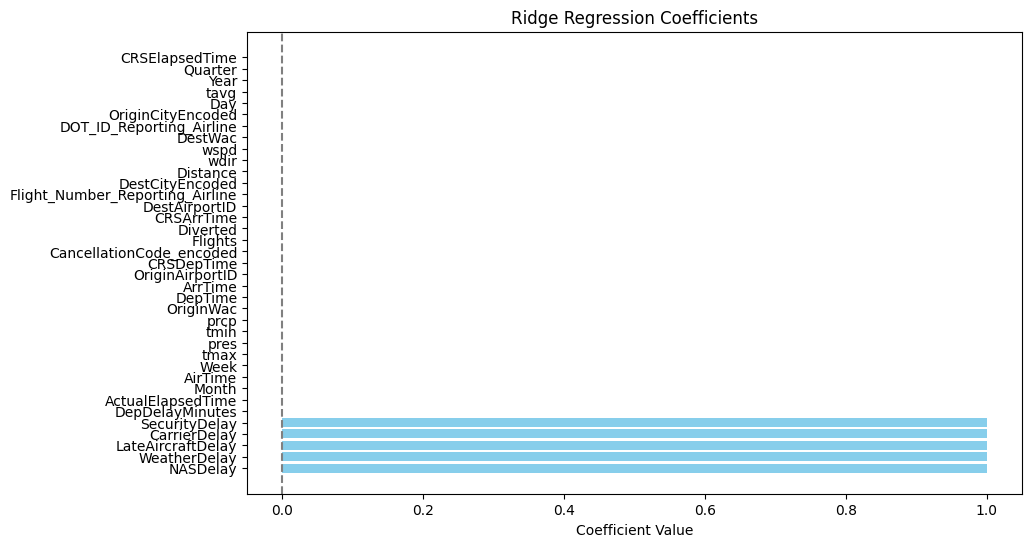

In [185]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Ridge Regressor): {mae}")
print(f"Mean Squared Error (Ridge Regressor): {mse}")
print(f"R^2 Score: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]


ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Ridge Regressor): {mae}")
print(f"Mean Squared Error (Ridge Regressor): {mse}")
print(f"R^2 Score: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
ridge = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha for regularization strength
ridge.fit(x_train, y_train)

# Make predictions
y_pred = ridge.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (Ridge Regressor): {mae}")
print(f"Mean Squared Error (Ridge Regressor): {mse}")
print(f"R^2 Score: {r2}")

coefficients = ridge.coef_.flatten()

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
plt.show()

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

if svr.kernel == 'linear':
    coefficients = svr.coef_.flatten()

    # Create a DataFrame for visualization
    coef_df = pd.DataFrame({
        'Feature': x_train.columns,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    # Plotting coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title('SVR Regression Coefficients (Linear Kernel)')
    plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
    plt.show()
else:
    print("Feature importances cannot be visualized for non-linear SVR models.")


In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]


svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust C and epsilon
from sklearn.multioutput import MultiOutputRegressor

# Wrap SVR with MultiOutputRegressor to handle multiple outputs
svr = SVR()
multi_target_svr = MultiOutputRegressor(svr)

# Fit the model on multi-target data
multi_target_svr.fit(x_train, y_train)

# Make predictions
y_pred = multi_target_svr.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

if svr.kernel == 'linear':
    coefficients = svr.coef_.flatten()

    # Create a DataFrame for visualization
    coef_df = pd.DataFrame({
        'Feature': x_train.columns,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    # Plotting coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.title('SVR Regression Coefficients (Linear Kernel)')
    plt.axvline(0, color='grey', linestyle='--')  # Vertical line at zero for reference
    plt.show()
else:
    print("Feature importances cannot be visualized for non-linear SVR models.")


Mean Absolute Error for tavg(Gradient Boosting Regressor): 6.16472484707506
Mean Squared Error for tavg(Gradient Boosting Regressor): 58.13064261318396
R^2 Score for tavg: 0.24357965077833765
Mean Absolute Error for tmin(Gradient Boosting Regressor): 6.2137670919753845
Mean Squared Error for tmin(Gradient Boosting Regressor): 61.06716834708411
R^2 Score for tmin: 0.19662878327260935
Mean Absolute Error for tmax(Gradient Boosting Regressor): 6.570525447585771
Mean Squared Error for tmax(Gradient Boosting Regressor): 64.63206392801747
R^2 Score for tmax: 0.2560255560611824
Mean Absolute Error for prcp(Gradient Boosting Regressor): 4.328112794982124
Mean Squared Error for prcp(Gradient Boosting Regressor): 67.88495261202105
R^2 Score for prcp: -0.05174343900307621
Mean Absolute Error for wdir(Gradient Boosting Regressor): 96.42766383367965
Mean Squared Error for wdir(Gradient Boosting Regressor): 12219.896875372031
R^2 Score for wdir: -0.0033015172366956946
Mean Absolute Error for wspd(Gr

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Mean Absolute Error for 'ArrDelayMinutes' (Gradient Boosting Regressor): 48.495266120632635
Mean Squared Error for 'ArrDelayMinutes' (Gradient Boosting Regressor): 10968.854170110464
R^2 Scorefor 'ArrDelayMinutes': -0.015792116360353825


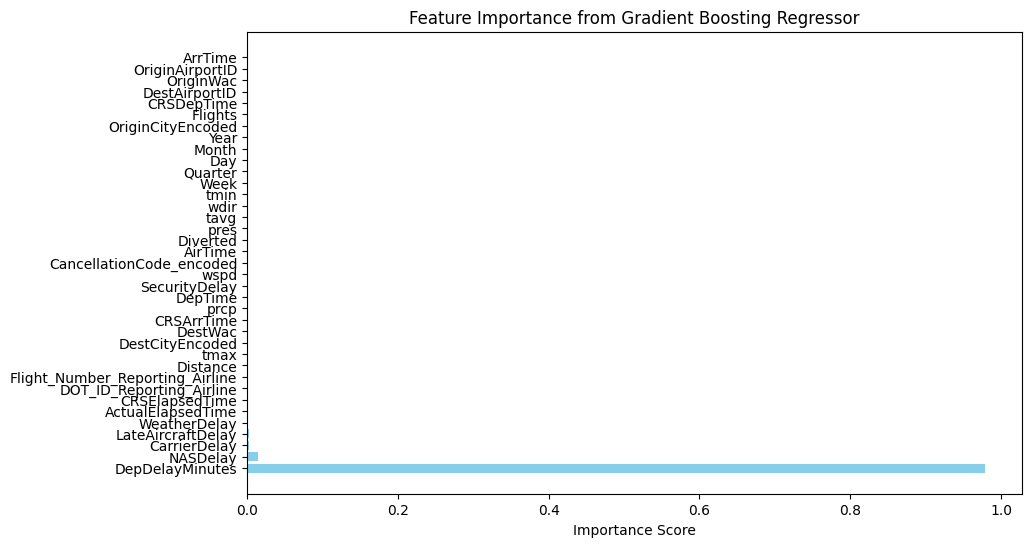

In [189]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
columns = y_train.columns
dtypes = {
    'tavg':'float64',
    'tmin':'float64',
    'tmax':'float64',
    'prcp':'float64',
    'wdir':'float64',
    'wspd':'float64',
    'pres':'float64'
}
y_pred = pd.DataFrame(columns=columns).astype(dtypes)
for col in columns:
    gbr.fit(x_train, y_train[col])

    # Make predictions
    y_pred[col] = gbr.predict(x_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test[col], y_pred[col])
    mse = mean_squared_error(y_test[col], y_pred[col])
    r2 = r2_score(y_test[col], y_pred[col])

    print(f"Mean Absolute Error for {col}(Gradient Boosting Regressor): {mae}")
    print(f"Mean Squared Error for {col}(Gradient Boosting Regressor): {mse}")
    print(f"R^2 Score for {col}: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
columns = y_train.columns
dtypes = {
    'Diverted':'int64',
    'ActualElapsedTime':'float64',
    'AirTime':'float64',
    'CarrierDelay':'float64',
    'WeatherDelay':'float64',
    'NASDelay':'float64',
    'SecurityDelay':'float64',
    'LateAircraftDelay':'float64',
    'CancellationCode_encoded':'int64'
}
y_pred = pd.DataFrame(columns=columns).astype(dtypes)
for col in columns:
    gbr.fit(x_train, y_train[col])

    # Make predictions
    y_pred[col] = gbr.predict(x_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test[col], y_pred[col])
    mse = mean_squared_error(y_test[col], y_pred[col])
    r2 = r2_score(y_test[col], y_pred[col])

    print(f"Mean Absolute Error {col} (Gradient Boosting Regressor): {mae}")
    print(f"Mean Squared Error {col} (Gradient Boosting Regressor): {mse}")
    print(f"R^2 Score for {col}: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
columns = y_train.columns
dtypes = {
    'DepTime':'float64',
    'DepDelayMinutes':'float64',
    'ArrTime':'float64'
}
y_pred = pd.DataFrame(columns=columns).astype(dtypes)
for col in columns:
    gbr.fit(x_train, y_train[col])

    # Make predictions
    y_pred[col] = gbr.predict(x_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test[col], y_pred[col])
    mse = mean_squared_error(y_test[col], y_pred[col])
    r2 = r2_score(y_test[col], y_pred[col])

    print(f"Mean Absolute Error for {col} (Gradient Boosting Regressor): {mae}")
    print(f"Mean Squared Error {col}(Gradient Boosting Regressor): {mse}")
    print(f"R^2 Score for {col}: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error for 'ArrDelayMinutes' (Gradient Boosting Regressor): {mae}")
print(f"Mean Squared Error for 'ArrDelayMinutes' (Gradient Boosting Regressor): {mse}")
print(f"R^2 Scorefor 'ArrDelayMinutes': {r2}")

importances = gbr.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]


gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = gbr.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()

In [ ]:
!pip install lightgbm

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Make predictions
y_pred = gbr.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = gbr.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.show()

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = lgb_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from LightGBM Regressor')
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
lgb_regressor.fit(x_train, y_train)

# Make predictions
y_pred = lgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = lgb_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from LightGBM Regressor')
plt.show()

In [ ]:
!pip install xgboost

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = xg_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from XGBoost Regressor')
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
xg_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xg_regressor.fit(x_train, y_train)

# Make predictions
y_pred = xg_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

importances = xg_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from XGBoost Regressor')
plt.show()


In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = et_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Extra Trees Regressor')
plt.show()y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]


In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]


et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
et_regressor = ExtraTreesRegressor(n_estimators=100, random_state=42)
et_regressor.fit(x_train, y_train)

# Make predictions
y_pred = et_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = et_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Extra Trees Regressor')
plt.show()

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]

elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

coefficients = elastic_net_regressor.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients from Elastic Net Regressor')
plt.axvline(0, color='black', lw=1)
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions
y_pred = elastic_net_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


coefficients = elastic_net_regressor.coef_

# Create a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients from Elastic Net Regressor')
plt.axvline(0, color='black', lw=1)
plt.show()

In [ ]:
!pip install catboost

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

In [ ]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = cat_regressor.get_feature_importance()

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from CatBoost Regressor')
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
cat_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, silent=True)
cat_regressor.fit(x_train, y_train)

# Make predictions
y_pred = cat_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = cat_regressor.get_feature_importance()

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from CatBoost Regressor')
plt.show()

In [191]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [198]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [201]:
y_train.columns

Index(['DepTime', 'DepDelayMinutes', 'ArrTime'], dtype='object')

In [206]:
y_train = train_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
y_test = test_df[['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'], axis = 1)
ada_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                                   n_estimators=100, random_state=42)
columns = y_train.columns
dtypes = {
    'tavg':'float64',
    'tmin':'float64',
    'tmax':'float64',
    'prcp':'float64',
    'wdir':'float64',
    'wspd':'float64',
    'pres':'float64'
}
y_pred = pd.DataFrame(columns=columns).astype(dtypes)
for col in columns:
    ada_regressor.fit(x_train, y_train[col])

    # Make predictions
    y_pred[col] = ada_regressor.predict(x_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test[col], y_pred[col])
    mse = mean_squared_error(y_test[col], y_pred[col])
    r2 = r2_score(y_test[col], y_pred[col])

    print(f"Mean Absolute Error {col} (AdaBoosting Regressor): {mae}")
    print(f"Mean Squared Error {col} (AdaBoosting Regressor): {mse}")
    print(f"R^2 Score for {col}: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
ada_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                                   n_estimators=100, random_state=42)
columns = y_train.columns
dtypes = {
    'Diverted':'int64',
    'ActualElapsedTime':'float64',
    'AirTime':'float64',
    'CarrierDelay':'float64',
    'WeatherDelay':'float64',
    'NASDelay':'float64',
    'SecurityDelay':'float64',
    'LateAircraftDelay':'float64',
    'CancellationCode_encoded':'int64'
}
y_pred = pd.DataFrame(columns=columns).astype(dtypes)
for col in columns:
    ada_regressor.fit(x_train, y_train[col])

    # Make predictions
    y_pred[col] = ada_regressor.predict(x_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test[col], y_pred[col])
    mse = mean_squared_error(y_test[col], y_pred[col])
    r2 = r2_score(y_test[col], y_pred[col])

    print(f"Mean Absolute Error {col} (AdaBoosting Regressor): {mae}")
    print(f"Mean Squared Error {col} (AdaBoosting Regressor): {mse}")
    print(f"R^2 Score for {col}: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)

y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
ada_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                                   n_estimators=100, random_state=42)
columns = y_train.columns
dtypes = {
    'DepTime':'float64',
    'DepDelayMinutes':'float64',
    'ArrTime':'float64',
}
y_pred = pd.DataFrame(columns=columns).astype(dtypes)
for col in columns:
    ada_regressor.fit(x_train, y_train[col])

    # Make predictions
    y_pred[col] = ada_regressor.predict(x_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test[col], y_pred[col])
    mse = mean_squared_error(y_test[col], y_pred[col])
    r2 = r2_score(y_test[col], y_pred[col])

    print(f"Mean Absolute Error {col} (AdaBoosting Regressor): {mae}")
    print(f"Mean Squared Error {col} (AdaBoosting Regressor): {mse}")
    print(f"R^2 Score for {col}: {r2}")

y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
ada_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                                   n_estimators=100, random_state=42)
ada_regressor.fit(x_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error for 'ArrDelayMinutes': ", mae)
print("Mean Squared Error for 'ArrDelayMinutes':", mse)
print("R^2 Score for 'ArrDelayMinutes':", r2)




Mean Absolute Error tavg (AdaBoosting Regressor): 5.602980538703139
Mean Squared Error tavg (AdaBoosting Regressor): 50.32626168473028
R^2 Score for tavg: 0.4384485152381288
Mean Absolute Error tmin (AdaBoosting Regressor): 6.5996458963378934
Mean Squared Error tmin (AdaBoosting Regressor): 66.21865677961503
R^2 Score for tmin: 0.24263454239876414
Mean Absolute Error tmax (AdaBoosting Regressor): 6.082475025411827
Mean Squared Error tmax (AdaBoosting Regressor): 57.10700643219791
R^2 Score for tmax: 0.42966050869661365
Mean Absolute Error prcp (AdaBoosting Regressor): 6.232048931681931
Mean Squared Error prcp (AdaBoosting Regressor): 85.16221219703937
R^2 Score for prcp: -0.17056479698499327
Mean Absolute Error wdir (AdaBoosting Regressor): 88.75542938291102
Mean Squared Error wdir (AdaBoosting Regressor): 10786.686455346835
R^2 Score for wdir: -0.0037844079755569027
Mean Absolute Error wspd (AdaBoosting Regressor): 5.656421131796352
Mean Squared Error wspd (AdaBoosting Regressor): 46.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error for 'ArrDelayMinutes':  252.53853786817828
Mean Squared Error for 'ArrDelayMinutes': 68997.29500174108
R^2 Score for 'ArrDelayMinutes': -5.010861030690967


ValueError: All arrays must be of the same length

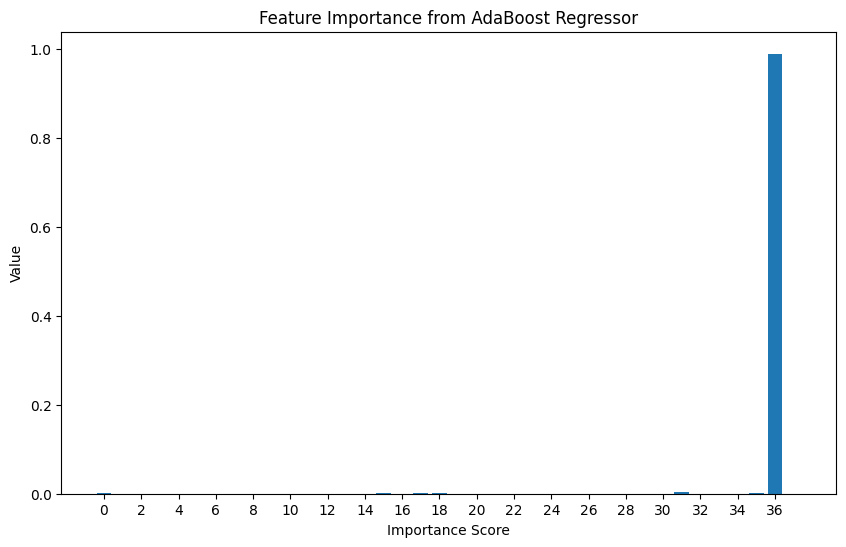

In [216]:
importances = ada_regressor.feature_importances_
# print(importances)

"""# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from AdaBoost Regressor')
plt.show()"""

# Indices for each bar
indices = np.arange(len(importances))
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(indices, importances)
plt.xticks(indices[::2])
plt.xlabel("Importance Score")
plt.ylabel("Value")
plt.title("Feature Importance from AdaBoost Regressor")
plt.show()

In [ ]:
y_train = train_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_train = train_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
y_test = test_df[['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded']]
x_test = test_df.drop(['DateObjects', 'DepTime', 'DepDelayMinutes', 'ArrTime', 'ArrDelayMinutes', 'Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'], axis = 1)
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                   n_estimators=100, random_state=42)
ada_regressor.fit(x_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['Diverted', 'ActualElapsedTime', 'AirTime', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode_encoded'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['DepTime', 'DepDelayMinutes', 'ArrTime']]
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                   n_estimators=100, random_state=42)
ada_regressor.fit(x_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
y_pred = pd.DataFrame(y_pred,  columns = ['DepTime', 'DepDelayMinutes', 'ArrTime'])
x_train = pd.concat([x_train,y_train], axis = 1)
y_train = train_df[['ArrDelayMinutes']]

x_test = pd.concat([x_test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)
y_test = test_df[['ArrDelayMinutes']]
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                   n_estimators=100, random_state=42)
ada_regressor.fit(x_train, y_train)

# Make predictions
y_pred = ada_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
importances = ada_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from AdaBoost Regressor')
plt.show()

In [190]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
model = ARIMA(y_train, order=(2, 1, 2))  # (p, d, q)
arima_model = model.fit()

# Forecast on the test set
forecast = arima_model.forecast(steps=len(y_test))

# Evaluate the model
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)
print("mean Absolute Error: ", mae)
print("Mean Squared Error:", mse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

In [203]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [204]:
model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_model = model.fit()

# Forecast on the test set
forecast = sarimax_model.forecast(steps=len(y_test))

# Evaluate the model
mse = mean_squared_error(y_test, forecast)
print("Mean Squared Error:", mse)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.legend()
plt.title('SARIMAX Forecast')
plt.show()

ValueError: SARIMAX models require univariate `endog`. Got shape (82722, 3).